# Исследование надежности заемщиков.

Описание проекта

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

Посмотрим общую информацию по датафрему, из каких столбцов состоит, и проверим, есть ли пропуски.

In [1]:
# импортируем библиотеку пандас и выводим информацию о таблице и первые 15 строк
import pandas as pd

try:
    df = pd.read_csv('C:/Users/datasets/data.csv')
except:
    df = pd.read_csv('/datasets/data.csv')  # Серверный путь
        
# df = pd.read_csv('/datasets/data.csv')
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Шаг 2.1 Заполнение пропусков

In [2]:
#df.isnull().sum() #смотрим количество пропусков в столбцах
df[df['total_income'].isnull()].head(15) 
#пропуски в столбцах совпадают с доходом и стажем 
#есть вероятность, что это связано с тем, что человек не работает или не предоставил данные о доходах/стаже


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [3]:
print('Доля пропусков в процентах составляет:')
df.isna().mean()
#проверяем, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;

Доля пропусков в процентах составляет:


children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64


   <b> Возможные причины пропуска:</b>
    

- отсутствие работы;
    
- отсутствие необходимых документов, которые нужно предоставить в банк (например, справка о доходах и пр.)

- неофициальный доход, который невозможно отразить
</div>

<AxesSubplot:xlabel='total_income', ylabel='income_type'>

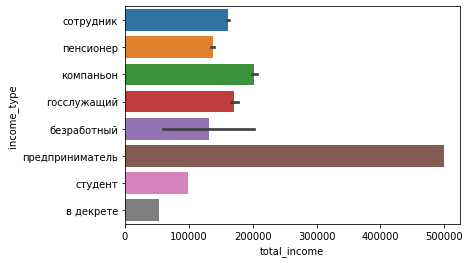

In [4]:
import seaborn as sns
#x = df['days_employed']
x = df['total_income'] 
y = df['income_type']

sns.barplot(x=x, y=y)
#sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='days_employed', ylabel='income_type'>

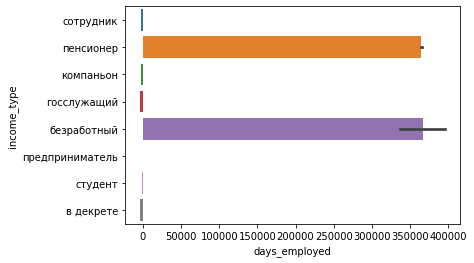

In [5]:
# по выводу в таблице я обратила внимание, что положительные значения в стаже встречаются только у пенсионеров.
# теперь проверим по графику у кого больше всего стаж и верно ли мое замечание
import seaborn as sns
x = df['days_employed']
#x = df['total_income'] 
y = df['income_type']

sns.barplot(x=x, y=y)

<div class="alert alert-info">
     По графику и по вычислениям удалось выяснить и поправить мою гипотезу - Положительные и аномально большие значения в стаже у пенсионеров и безработных.
  
</div>

<div class="alert alert-info"> 
     Заполним пропуским именно медианными значениями, т.к. среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства.
    Стаж и доход будем вычислять, ориентируясь на 2 параметра: уровень образования и тип занятости, т.к. они наиболее актуальные для этих показателей.
</div>

In [6]:

import math 
# сначала создаем функцию для вычисления медианных значений дохода
def income_median(df, education_level, income_type):
    # берем медианные значения для дохода из тех строк, где доход и стаж будут совпадать со строками где пропуски
    try:
        median_total_income = df[(df['education'] == education_level) & (df['income_type'] == income_type)]['total_income'].median()
        # если будет возникать ошибка, например отсутствие совпадений, то будем брать медиану, не обрщая внимания на 2 параметра
    except:
        if math.isnan(median_total_income):
            median_total_income = df['total_income'].median()
    return median_total_income

def days_median(df, education_level, income_type):
    # берем медианные значения для стажа из тех строк, где доход и стаж будут совпадать со строками где пропуски
    try:
        median_days_employed = df[(df['education'] == education_level) & (df['income_type'] == income_type)]['days_employed'].median()
    # если будет возникать ошибка, например отсутствие совпадений, то будем брать медиану, не обрщая внимания на 2 параметра
    except:
         if math.isnan(median_days_employed):
                median_days_employed = df['days_employed'].median()
    return median_days_employed

# проходимся по всем строчкам где пропуски в доходах
for education_level in df[df['total_income'].isnull()]['education'].unique():
    for income_type in df[df['total_income'].isnull()]['income_type'].unique():
        median_total_income = income_median(df, education_level, income_type)
        nan_income = (df['education'] == education_level) & (df['income_type'] == income_type) & (df['total_income'].isna())
        df.loc[nan_income, 'total_income'] = df.loc[nan_income, 'total_income'].fillna(median_total_income) 
#         заменяем строки с пропусками в доходах медианным значением, которое найдем с помощью функции, написанной выше
        
for education_level in df[df['days_employed'].isnull()]['education'].unique():
    for income_type in df[df['days_employed'].isnull()]['income_type'].unique():
        median_days_employed = days_median(df, education_level, income_type)
        nan_days = (df['education'] == education_level) & (df['income_type'] == income_type) & (df['days_employed'].isna())
        df.loc[nan_days, 'days_employed'] = df.loc[nan_days, 'days_employed'].fillna(median_days_employed)
#         заменяем строки с пропусками в стаже медианным значением, которое найдем с помощью функции, написанной выше
df.info()
# проверяем наличие пропусков


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.sort_values(by='days_employed').head(15)
# сортируем по стажу для наглядности

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью
4299,0,-17615.563266,61,среднее,1,женат / замужем,0,F,компаньон,0,122560.741753,покупка жилья
7329,0,-16593.472817,60,высшее,0,женат / замужем,0,F,сотрудник,0,124697.846781,заняться высшим образованием
17838,0,-16264.699501,59,среднее,1,женат / замужем,0,F,сотрудник,0,51238.967133,на покупку автомобиля
16825,0,-16119.687737,64,среднее,1,женат / замужем,0,F,сотрудник,0,91527.685995,покупка жилой недвижимости
3974,0,-15835.725775,64,среднее,1,гражданский брак,1,F,компаньон,0,96858.531436,сыграть свадьбу
1539,0,-15785.678893,59,высшее,0,Не женат / не замужем,4,F,сотрудник,0,119563.851852,операции с коммерческой недвижимостью
4321,0,-15773.061335,61,среднее,1,гражданский брак,1,F,сотрудник,0,205868.585780,свадьба
7731,0,-15618.063786,64,среднее,1,женат / замужем,0,F,компаньон,0,296525.358574,высшее образование
15675,0,-15410.040779,65,высшее,0,женат / замужем,0,F,сотрудник,0,188800.068859,покупка жилой недвижимости


In [8]:
df['income_type'].value_counts()
# проверим какие уникальные значения встречаются в столбце income_type - "тип занятости" и в каком количестве

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

<div class="alert alert-info">
Когда я строила barplot я заметила что самое маленькое минусовое значение стажа есть в категории "студент", а самые большие положительные в категории "пенсионер".


<b>По нему будет проще проверить мою гипотезу, что в минусовых значениях верно посчитаны дни стажа, а в значениях с минусом видимо ошибочно использована формула и все данные представлены в часах
</div>

In [9]:
# сначала выведем строку по студентам

df[df['income_type'] == 'студент']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9410,0,-578.751554,22,высшее,0,Не женат / не замужем,4,M,студент,0,98201.625314,строительство собственной недвижимости


In [10]:
# теперь строчки по "пенсионерам"
# возьмем, например, 5 последних, чтобы видеть максимальные значения
df[df['income_type'] == 'пенсионер'].tail(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем


### Шаг 2.2 Проверка данных на аномалии и исправления.

Приведем данные к одному стилю. Исправляем регистр в столбцах образования и положения.

In [11]:
df['family_status'] = df['family_status'].str.lower() # заменили в значениях все на строчные буквы в столбце статуса
df[df['total_income'].isnull()].head(5) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [12]:
#  заменили в значениях все на строчные буквы в столбце образования
df['education'] = df['education'].str.lower()
#df.head(5)
df.tail(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Теперь рассмотрим аномальные значения.

In [13]:
# проверим уникальные значения в столбце по количеству детей
df['children'].value_counts()


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

<div class="alert alert-info">
    Аномальные значения в количестве детей "-1" и "20"
</div>

In [14]:
#df['dob_years'].value_counts().sort
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

<div class="alert alert-info">
Так как доля этих аномальных значений(нулевой возраст и значения в количестве детей "-1" и "20") мала и она не повлияет на статистику, то их можно удалить.
</div>

In [15]:
df = df[(df['children'] != -1)&(df['children'] != 20)]
# аномальные значения в количестве детей "-1" и "20" убираем
df['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [16]:
df = df[(df['dob_years'] != 0)] 
# оставляем только те строки где возраст не равен 0
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

In [17]:
# выведем все положительные значения стажа, группируя по категориям
df[df['days_employed']>0]['income_type'].unique()

array(['пенсионер', 'безработный'], dtype=object)

<AxesSubplot:xlabel='days_employed', ylabel='income_type'>

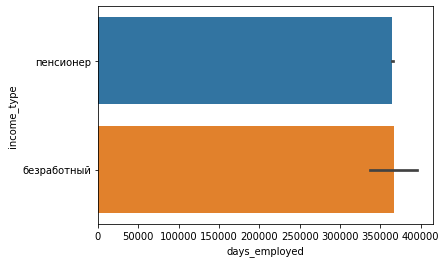

In [18]:
df_days = df[df['days_employed']>0] #создаю новый датафрейм для строк где стаж больше ноля
sns.barplot(x = df_days['days_employed'], y =  df_days['income_type']) #по графику видно, что все положительные значения - значительно больше возможных реальных



   
   <div class="alert alert-info"> Моя гипотеза подтвердилась - положительные и аномально большие знаения есть в 2 категориях - пенсионеры и безработные.
    Предполагаю, что эти аномально большие значения появились, потому что посчитаны данные в часах.
    Если перевести в дни, то в целом все соответсвует реальности. А минусовые значения просто возьмем по модулю.
  
</div>

In [19]:
df.loc[df['days_employed']>0,'days_employed'] = (df.loc[df['days_employed']>0,'days_employed']/24)
#делим все положительные числа на 24, чтобы перевести в дни

df.head(5) #проверяем

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [20]:
df.loc[df['days_employed']<0,'days_employed'] = df.loc[df['days_employed']<0,'days_employed'].abs()
# избавляемся от отрицательных чисел

df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


### Шаг 2.3. Изменение типов данных.

In [21]:
df['days_employed'] = df['days_employed'].astype('int') 
# преобразуем стаж и доход в целые числа
df['total_income'] = df['total_income'].astype('int') 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21302 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21302 non-null  int64 
 1   days_employed     21302 non-null  int64 
 2   dob_years         21302 non-null  int64 
 3   education         21302 non-null  object
 4   education_id      21302 non-null  int64 
 5   family_status     21302 non-null  object
 6   family_status_id  21302 non-null  int64 
 7   gender            21302 non-null  object
 8   income_type       21302 non-null  object
 9   debt              21302 non-null  int64 
 10  total_income      21302 non-null  int64 
 11  purpose           21302 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


### Шаг 2.4. Удаление дубликатов.

In [23]:
df.duplicated().sum()
# найдем количество явных дубликатов

54

In [24]:
# удаляем явные дубликаты и проверяем результат
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.duplicated().sum()

0

<div class="alert alert-info">
    Неявные дубликаты тоже нужно удалить.
    В столбце education есть одни и те же значения, но записанные по-разному. Ранее мы исправили значения, оформив их в один регистр.
    В столбце "purpose" - причины указаны по-разному, но в целом их можно разбить на 4 категорий:
    <p>'операции с автомобилем',
'операции с недвижимостью',
'проведение свадьбы',
        'получение образования'</p>
    Скорее всего это произошло, т.к. ввод данных был ручной, а категории заранее не  были определены.
  
</div>

In [25]:
<div class="alert alert-info"># проверим какие уникальные значения присутстсвует в столбце с целью кредита
df['purpose'].value_counts()

свадьба                                   787
на проведение свадьбы                     764
сыграть свадьбу                           759
операции с недвижимостью                  669
покупка коммерческой недвижимости         656
покупка жилья для сдачи                   648
операции с коммерческой недвижимостью     643
операции с жильем                         641
покупка жилья для семьи                   636
жилье                                     635
покупка жилья                             634
недвижимость                              627
строительство собственной недвижимости    626
операции со своей недвижимостью           623
строительство недвижимости                619
строительство жилой недвижимости          618
покупка своего жилья                      618
покупка недвижимости                      613
ремонт жилью                              602
покупка жилой недвижимости                599
на покупку своего автомобиля              501
заняться высшим образованием      

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [26]:
# создаем словарь для education
df_education = df[['education_id', 'education']]
df_education = df_education.drop_duplicates().reset_index(drop=True)
df_education.head(7)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [27]:
# создаем словарь для family_status
df_family_status = df[['family_status_id', 'family_status']]
df_family_status = df_family_status.drop_duplicates().reset_index(drop=True)
df_family_status.head()

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем



    Удаляем из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id. 

In [28]:
del df['education']
del df['family_status']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21248 entries, 0 to 21524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21248 non-null  int64 
 1   days_employed     21248 non-null  int64 
 2   dob_years         21248 non-null  int64 
 3   education_id      21248 non-null  int64 
 4   family_status_id  21248 non-null  int64 
 5   gender            21248 non-null  object
 6   income_type       21248 non-null  object
 7   debt              21248 non-null  int64 
 8   total_income      21248 non-null  int64 
 9   purpose           21248 non-null  object
dtypes: int64(7), object(3)
memory usage: 1.8+ MB


In [29]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Шаг 2.6. Категоризация дохода.

In [30]:
# cjplftv функцию для распределений дохода по категориям согласно условиям
def total_income_cat(total_income):
    if total_income < 30000:
        return 'E'
    if 30000 <= total_income < 50000:
        return 'D'
    if 50000 <= total_income < 200000:
        return 'C'
    if 200000 <= total_income < 1000000:
        return 'B'
    if total_income > 1000000:
        return 'A'


df['income_category'] = df['total_income'].apply(total_income_cat)
# применяем функцию
df['income_category'].value_counts() 
# проверяем распределение по категориям

C    15686
B     5168
D      347
A       25
E       22
Name: income_category, dtype: int64

### Шаг 2.7. Категоризация целей кредита.

In [31]:
# аналогичным образом создаем функцию с условиями для целей кредита
def cat_purpose(row):
    purp = row['purpose']
    if 'свадьб' in purp:
        return 'проведение свадьбы'
    elif 'недвижимост' in purp or 'жиль' in purp:
        return 'операции с недвижимостью'
    elif 'авто' in purp:
        return 'операции с автомобилем'
    elif 'образовани' in purp:
        return 'получение образования'
    return 'другое'

df['purpose_category'] = df.apply(cat_purpose, axis = 1)
df['purpose_category'].value_counts()
    
        

операции с недвижимостью    10707
операции с автомобилем       4260
получение образования        3971
проведение свадьбы           2310
Name: purpose_category, dtype: int64

In [32]:
del df['purpose'] #удаляем столбец с ручным вводом целей кредита, т.к. тееперь у нас есть отдельный столец с категориями
df.head()
# проверяем 

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,B,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,C,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,C,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,B,получение образования
4,0,14177,53,1,1,F,пенсионер,0,158616,C,проведение свадьбы


<div class="alert alert-info"><b>Теперь после предобработки таблица имеет четкую структуру и определенный тип данных, что позволит анализировать данные без "мусора".

### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?


debt,0,1,convers_debt,children
children,,,,
0,12980.000000,1058.000000,7.54%,нет детей
3,301.000000,27.000000,8.23%,3
1,4352.000000,441.000000,9.20%,1
2,1845.000000,194.000000,9.51%,2
4,37.000000,4.000000,9.76%,4
5,9.000000,nan,nan%,5


<AxesSubplot:xlabel='convers_debt', ylabel='children'>

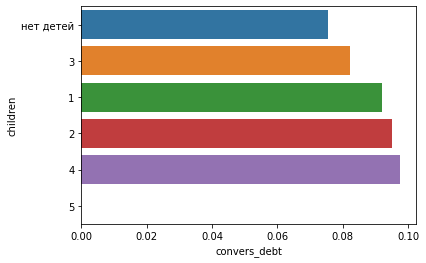

In [33]:

data_pivot = df.pivot_table(index=['children'], columns='debt', values='gender', aggfunc='count')
data_pivot['convers_debt'] = df[df['debt']==1]['children'].value_counts()/df['children'].value_counts()
# вычисляем конверсию только для тех значений где была задолженность, по отношению к общему количеству
# data_pivot.style.format({'column_name': '{:.2%}'})
data_pivot['children'] = ['нет детей', '1','2','3','4','5'] 
# для удобства добавим названия колонок

data_pivot = data_pivot.sort_values(by=('convers_debt'))
display(data_pivot.style.format({'convers_debt': '{:.2%}'}))

# сортируем по конверсии
sns.barplot( y = data_pivot['children'], x =  data_pivot['convers_debt'], data = data_pivot) 



<div class="alert alert-info">
Вывод 1: Как видно по получившимся данным и по графику - у людей, у которых 5 детей - просрочки отсутствуют(но их количество в таблице данных значительно мало, поэтому ориентироваться на них не стоит), меньше всего просрочек по кредитам у людей, не имеющих детей - около 7,5%.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?


debt,0,1,convers_debt
family_status,,,
вдовец / вдова,884,62,6.55%
в разводе,1095,84,7.12%
женат / замужем,11295,923,7.55%
гражданский брак,3742,383,9.28%
не женат / не замужем,2508,272,9.78%


<AxesSubplot:xlabel='convers_debt', ylabel='family_status'>

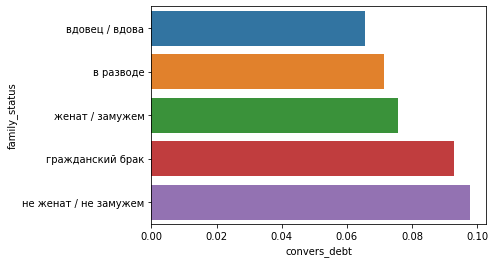

In [34]:
df_new = df.merge(df_family_status, on='family_status_id', how='left') 
# добавим из словаря колонку с текстовыми значениями статуса и присвоим значения в новый датафрейм
data_pivot = df_new.pivot_table(index=['family_status'], columns='debt', values='gender', aggfunc='count')
data_pivot['convers_debt'] = df_new[df_new['debt']==1]['family_status'].value_counts()/df_new['family_status'].value_counts()
# вычисляем конверсию только для тех значений где была задолженность, по отношению к общему количеству
data_pivot = data_pivot.sort_values(by=('convers_debt'))
display(data_pivot.style.format({'convers_debt': '{:.2%}'}))

# сортируем по конверсии
sns.barplot( y = data_pivot.index, x =  data_pivot['convers_debt'], data = data_pivot) 
# ось y возьмем по индексу, т.к. по смысловым значениям она уже адаптирована



<div class="alert alert-info">
    Вывод 2:
    Семейное положение тоже влияет на возврат кредита в срок. Меньше всего просрочек у людей со статусом "вдовец/вдова" - 6,55%, и самые ненадежные заемщики по возврату в срок - это люди в статусе "не замужем/ не женат" - 9,78%

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?


debt,0,1,convers_debt,income_name
income_category,,,,
A,23,2,8.00%,1000001 и выше
B,4807,361,6.99%,200001–1000000
C,14348,1338,8.53%,50001–200000
D,326,21,6.05%,30001–50000
E,20,2,9.09%,0–30000


<AxesSubplot:xlabel='convers_debt', ylabel='income_name'>

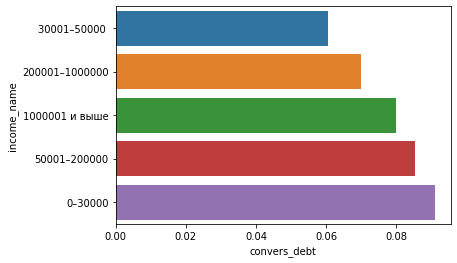

In [35]:

data_pivot = df.pivot_table(index=['income_category'], columns='debt', values='gender', aggfunc='count')
data_pivot['convers_debt'] = df[df['debt']==1]['income_category'].value_counts()/df['income_category'].value_counts()
# вычисляем конверсию только для тех значений где была задолженность, по отношению к общему количеству
# для удобства добавим названия колонок
data_pivot['income_name'] = ['1000001 и выше', '200001–1000000', '50001–200000','30001–50000 ','0–30000'] 
display(data_pivot.style.format({'convers_debt': '{:.2%}'}))

data_pivot = data_pivot.sort_values(by=('convers_debt'))
# сортируем по конверсии
sns.barplot( y = data_pivot['income_name'], x =  data_pivot['convers_debt'], data = data_pivot) 
# здесь y берем по значениям нового столбца, чтобы было нагляднее



<div class="alert alert-info">
    <b>Вывод 3:</b>
    Больше всего просрочек по кредиту у людей с меньшим уровнем и с самым высоким уровнями дохода, но так как в пердоставленных данных таблицы их количество значительно меньше остальных, их нельзя использовать для адекватного анализа. Поэтому более результативным будет тот факт, что:больше всего просрочек у категории людей со средним достатком - 8,54%

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?


debt,0,1,convers_debt
purpose_category,,,
операции с автомобилем,3863,397,9.32%
операции с недвижимостью,9930,777,7.26%
получение образования,3602,369,9.29%
проведение свадьбы,2129,181,7.84%


<AxesSubplot:xlabel='convers_debt', ylabel='purpose_category'>

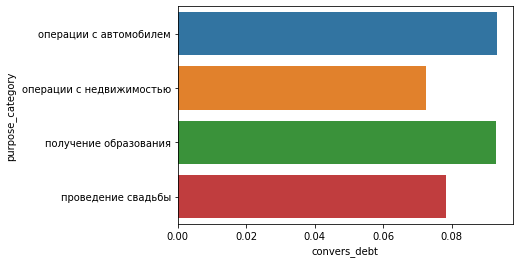

In [36]:
# data_pivot = df.pivot_table(index=['purpose_category'], columns='debt', values='gender', aggfunc='count')
# data_pivot['convers_debt'] = df[df['debt']==1]['purpose_category'].value_counts()/df['purpose_category'].value_counts()*100
# # вычисляем конверсию только для тех значений где была задолженность, по отношению к общему количеству
# data_pivot = data_pivot.sort_values(by=('convers_debt'))
# # сортируем по конверсии

#использую код ревьювера

data_pivot = df.pivot_table(index=['purpose_category'], columns='debt', values='gender', aggfunc='count')
data_pivot['convers_debt'] = df[df['debt']==1]['purpose_category'].value_counts()/df['purpose_category'].value_counts()
display(data_pivot.style.format({'convers_debt': '{:.2%}'}))

sns.barplot( y = data_pivot.index, x = data_pivot['convers_debt']) 
# ось y возьмем по индексу, т.к. по смысловым значениям она уже адаптирована



<div class="alert alert-info">
    Вывод 4:
    Здесь мы видим, что к ипотеке и к связанным с жильем кредитам - люди относятся серьезнее, просрочки меньше остальных категорий, всего - 7,26%. 

## Общий вывод:

<div class="alert alert-info">
Самые надежные заемщики - это люди, не имеющие детей.
    


<div class="alert alert-info">
    
<b>Вывод</b>    

    
Самый большой разрыв(разница около 3%) по доле просрочек по выборкам "категории дохода" и "семейное положение".
Больше всего просрочек по кредиту у людей со средним уровнем дохода, а также "свободных" по семейному положению.
    
Проверка по целям кредита не так показательна, т.к. разрывы между категориями незначительные. Но по ним видно, что ответственнее все-таки относятся к кредитам, связанным с недвижимостью.
    
<b> Для вычисления надежности заемщика по просрочкам следует учитывать, что категория заемщиков без детей имеет меньше всего просрочек, как на дополнительный показатель я бы советовала ориентироваться на категоризацию по "Семейному положению" и по "Уровню дохода", так как разница конверсий в данных категориях более показательна.
   
   -- 
    
    
Чтобы в последующем избежать ошибок в заполнении данных рекомендуется разбить на заданные категории данные в столбцах - "цель кредита", "образование", "семейное положение". Также это поможет исключить проблемы с разным регистром данных.
    
В данных по столбцам "стаж" и "доход" по умолчанию лучше использовать ограничение в целых положительных числах.
    
В данных "возраст" ограничить так же в целых положительных числах, и еще можно добавить ограничение в промежутке 18 до 100 лет, например, т.к. законодательно кредиты не выдать лицам младше определенного возраст, к тому же это исключить ошибки с 0 возрастом.
    
    